In [28]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [2]:
df = pd.read_csv('train_pronto.csv')

In [3]:
df.drop(['Unnamed: 0', 'weekend'], axis = 1, inplace = True)

In [4]:
class_name = 'Occupancy'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [5]:
#normalizzazione

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
#MULTILAYER PERCEPTRON

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [10]:
clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size=250, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 25), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=200, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9904761904761905
F1-score [0.99376906 0.97980232]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.96      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.99      4935
weighted avg       0.99      0.99      0.99      4935



C:\Users\Ale\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


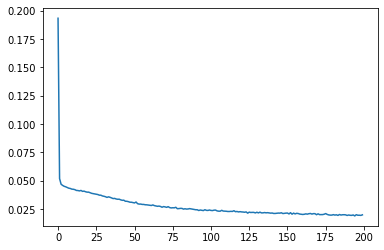

In [11]:

plt.plot(clf.loss_curve_)
plt.show()

## CON SOLVER SGD

In [12]:
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver' : 'sgd', 'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.5},
          {'solver' : 'sgd', 'learning_rate': 'constant', 'momentum' : 0.9, 'learning_rate_init': 0.5, 'nesterovs_momentum': False},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.5},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver' : 'sgd', 'learning_rate': 'adaptive', 'momentum': 0, 'learning_rate_init': 0.2},
          {'solver' : 'sgd', 'learning_rate': 'adaptive', 'momentum': 0.9, 'learning_rate_init': 0.2, 'nesterovs_momentum' : False},
          {'solver' : 'sgd', 'learning_rate': 'adaptive', 'momentum': 0, 'learning_rate_init': 0.5},
          {'solver' : 'sgd', 'learning_rate': 'adaptive', 'momentum': 0.9, 'learning_rate_init': 0.5, 'nesterovs_momentum' : False}]
    
labels = ["sgd constant learning-rate 0 momentum", "sgd constant with momentum quasi max momentum","sgd constant learning rate, zero momentum learning rate >", "sgd constant with momentum max, learning rate >",
          "sgd inv-scaling learning-rate 0 momentum",  "sgd inv-scaling with max momentum","sgd inv-scaling learning-rate 0 momentum learning rate >", "sgd inv-scaling with max momentum learning rate >", "sgd adaptive min momentum", "sgd adaptive max momentum"
         "sgd adaptive min momentum learning rate >","sgd adaptive max momentum learning rate >"]

sgd constant learning-rate 0 momentum
training set score and loss: 0.990, 0.037977


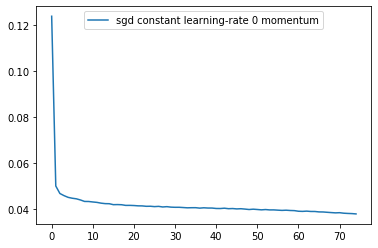

sgd constant with momentum quasi max momentum
training set score and loss: 0.990, 0.027195


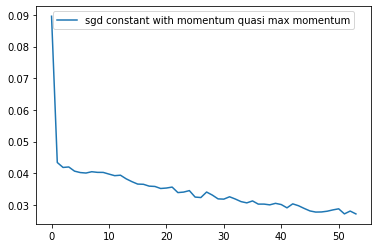

sgd constant learning rate, zero momentum learning rate >
training set score and loss: 0.990, 0.032384


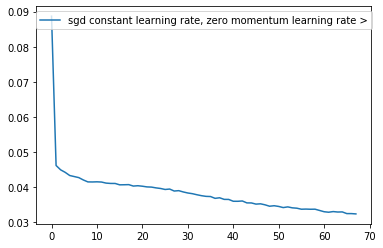

sgd constant with momentum max, learning rate >
training set score and loss: 0.991, 0.025112


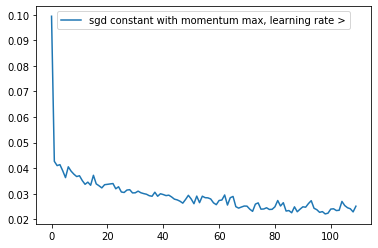

sgd inv-scaling learning-rate 0 momentum
training set score and loss: 0.990, 0.052036


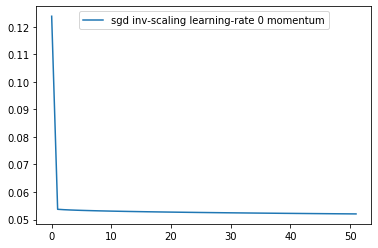

sgd inv-scaling with max momentum
training set score and loss: 0.990, 0.041463


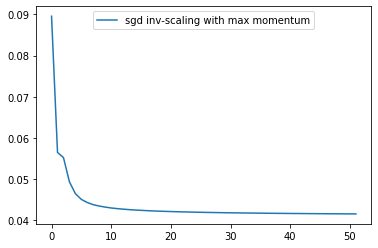

sgd inv-scaling learning-rate 0 momentum learning rate >
training set score and loss: 0.990, 0.045815


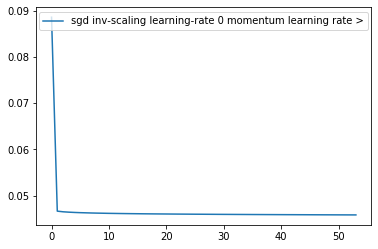

sgd inv-scaling with max momentum learning rate >
training set score and loss: 0.990, 0.041463


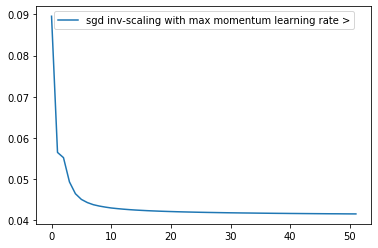

sgd adaptive min momentum
training set score and loss: 0.990, 0.036369


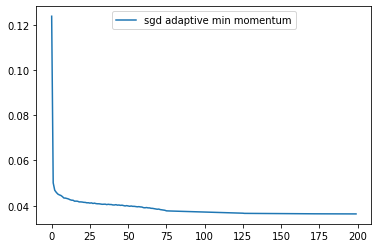

sgd adaptive max momentumsgd adaptive min momentum learning rate >
training set score and loss: 0.990, 0.022949


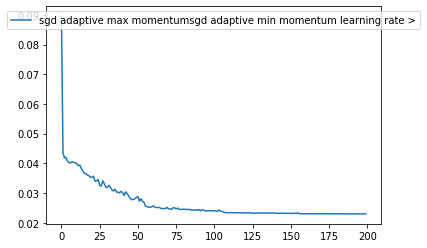

sgd adaptive max momentum learning rate >
training set score and loss: 0.990, 0.029593


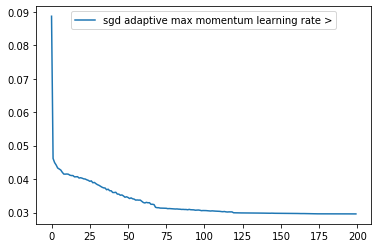

In [13]:
import warnings
from sklearn.exceptions import ConvergenceWarning
for label, param in zip(labels, params):
    print(label)
    clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size=250, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 25),
              max_fun=15000, max_iter=200,
              n_iter_no_change=50,
              power_t=0.5, random_state=0, shuffle=True,
              tol=0.0001, validation_fraction=0.2, verbose=False,
              warm_start=False, **param)

    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(X_train, y_train)

    print("training set score and loss: %.3f, %f" % (clf.score(X_train, y_train), clf.loss_))
    plt.plot(clf.loss_curve_, label=label)
    plt.legend(loc="upper center")
    plt.show()

## CON SOLVER lbfgs

In [14]:
params = [{'solver': 'lbfgs'}]
labels = ['lbfgs']

In [15]:
clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size=250, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 25),
              max_fun=15000, max_iter=20000,
              n_iter_no_change=50,
              power_t=0.5, random_state=0, shuffle=True,
              tol=0.0001, validation_fraction=0.2, verbose=False,
              warm_start=False, solver = 'lbfgs')
clf.fit(X_train, y_train)
print("training set score and loss: %.3f, %f" % (clf.score(X_train, y_train), clf.loss_))
plt.plot(clf.loss_curve_, label=label)
plt.legend(loc="upper center")
plt.show()

training set score and loss: 1.000, 0.000182


AttributeError: 'MLPClassifier' object has no attribute 'loss_curve_'

In [16]:
plt.plot(clf.loss_curve_)
plt.show()

AttributeError: 'MLPClassifier' object has no attribute 'loss_curve_'

In [17]:
# se non può essere settato un learning rate non ci sarà nemmeno una loss curve? può essere?

## CON ADAM

In [18]:
params = [{'solver': 'adam', 'learning_rate': 'constant', 'momentum': 0,'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver' : 'adam', 'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.5},
          {'solver' : 'adam', 'learning_rate': 'constant', 'momentum' : 0.9, 'learning_rate_init': 0.5, 'nesterovs_momentum': False},
          {'solver': 'adam', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.5},
          {'solver': 'adam', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver' : 'adam', 'learning_rate': 'adaptive', 'momentum': 0, 'learning_rate_init': 0.2},
          {'solver' : 'adam', 'learning_rate': 'adaptive', 'momentum': 0.9, 'learning_rate_init': 0.2, 'nesterovs_momentum' : False},
          {'solver' : 'adam', 'learning_rate': 'adaptive', 'momentum': 0, 'learning_rate_init': 0.5},
          {'solver' : 'adam', 'learning_rate': 'adaptive', 'momentum': 0.9, 'learning_rate_init': 0.5, 'nesterovs_momentum' : False}]
    
labels = ["adam constant learning-rate 0 momentum", "adam constant with momentum quasi max momentum","adam constant learning rate, zero momentum learning rate >", "adam constant with momentum max, learning rate >",
          "adam inv-scaling learning-rate 0 momentum",  "adam inv-scaling with max momentum","adam inv-scaling learning-rate 0 momentum learning rate >", "adam inv-scaling with max momentum learning rate >", "adam adaptive min momentum", "adam adaptive max momentum"
         "adam adaptive min momentum learning rate >","adam adaptive max momentum learning rate >"]

adam constant learning-rate 0 momentum
training set score and loss: 0.990, 0.232634


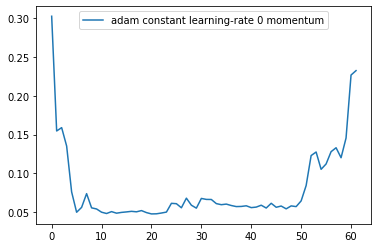

adam constant with momentum quasi max momentum
training set score and loss: 0.990, 0.232634


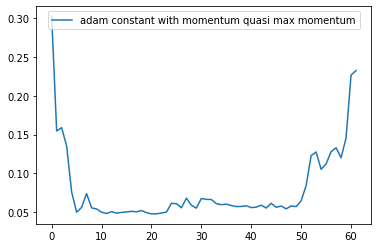

adam constant learning rate, zero momentum learning rate >
training set score and loss: 0.987, 0.618483


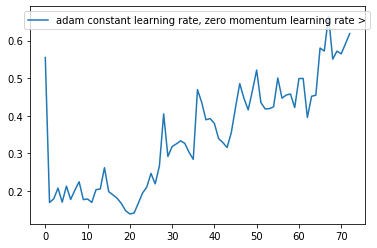

adam constant with momentum max, learning rate >
training set score and loss: 0.987, 0.618483


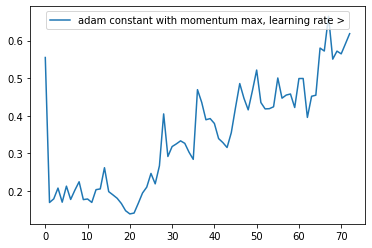

adam inv-scaling learning-rate 0 momentum
training set score and loss: 0.990, 0.232634


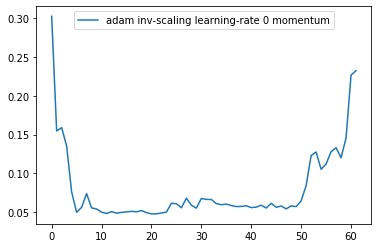

adam inv-scaling with max momentum
training set score and loss: 0.990, 0.232634


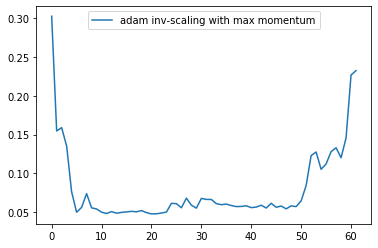

adam inv-scaling learning-rate 0 momentum learning rate >
training set score and loss: 0.987, 0.618483


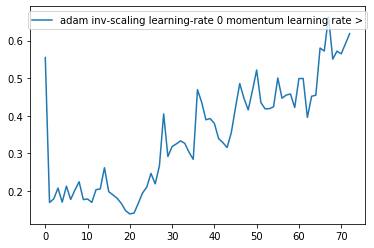

adam inv-scaling with max momentum learning rate >
training set score and loss: 0.990, 0.232634


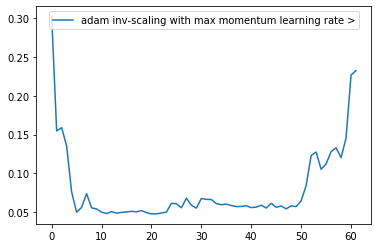

adam adaptive min momentum
training set score and loss: 0.990, 0.232634


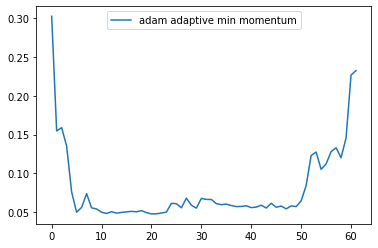

adam adaptive max momentumadam adaptive min momentum learning rate >
training set score and loss: 0.990, 0.232634


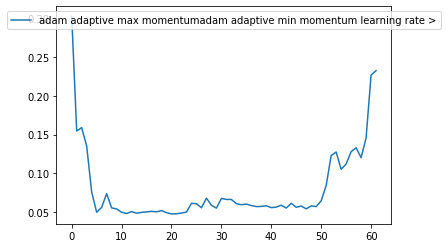

adam adaptive max momentum learning rate >
training set score and loss: 0.987, 0.618483


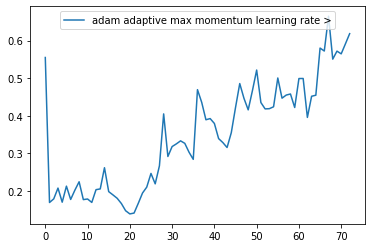

In [19]:
for label, param in zip(labels, params):
    print(label)
    clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size=250, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 25),
              max_fun=15000, max_iter=200,
              n_iter_no_change=50,
              power_t=0.5, random_state=0, shuffle=True,
              tol=0.0001, validation_fraction=0.2, verbose=False,
              warm_start=False, **param)

    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        clf.fit(X_train, y_train)

    print("training set score and loss: %.3f, %f" % (clf.score(X_train, y_train), clf.loss_))
    plt.plot(clf.loss_curve_, label=label)
    plt.legend(loc="upper center")
    plt.show()

In [20]:
# LE LOSS CURVES CON ADAM FANNO CAGARE, QUINDI DIREI DI SCARTARLO E TENERE COME SOLVER SGD

In [21]:
clf = MLPClassifier(activation='tanh', alpha=0.0001, batch_size=250, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 25), learning_rate='adaptive',
              learning_rate_init=0.02, max_fun=15000, max_iter=2000,
              momentum=0, n_iter_no_change=50, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.2, verbose=False,
              warm_start=False)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9884498480243161
F1-score [0.99243128 0.97563061]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3791
           1       0.95      1.00      0.98      1144

    accuracy                           0.99      4935
   macro avg       0.98      0.99      0.98      4935
weighted avg       0.99      0.99      0.99      4935



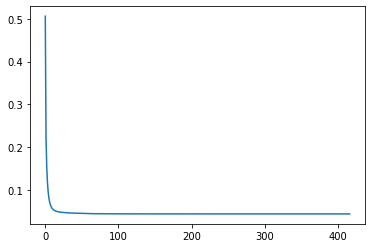

In [22]:
plt.plot(clf.loss_curve_)
plt.show()

## ROC CURVE

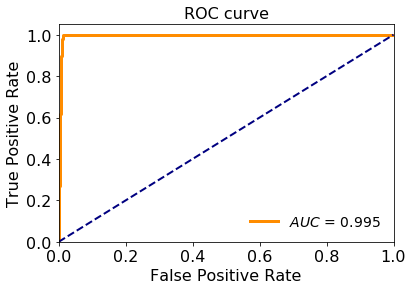

In [27]:
y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=3, label='$AUC$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

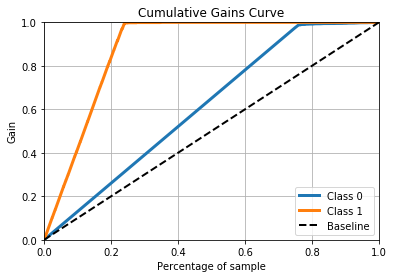

In [29]:
plot_cumulative_gain(y_test, y_score)
plt.show()

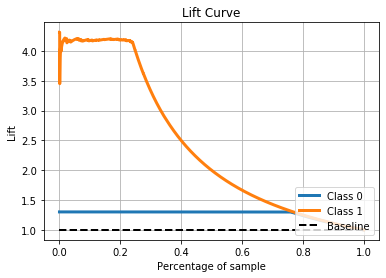

In [30]:
plot_lift_curve(y_test, y_score)
plt.show()